# **Skills for Data Analysts**

# 1、Data Clean

In [202]:
import pandas as pd
import numpy as np

from scipy.stats import spearmanr
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt


In [203]:
path = "_raw _data.xlsx"
df = pd.read_excel(path)

df.head()


,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、Gender,2、 Age group,3、Level of study,4、Weekly study hours outside class,...,"13、 I use active techniques (practice questions, flashcards, summaries).",14、I review course content regularly during the semester.,"15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.",16、Digital tools help me organize learning materials efficiently.,17、I use AI tools mainly to clarify concepts rather than copy answers.,18、Studying with others helps me understand difficult topics better,19、I actively contribute in group study (sharing notes/explaining concepts).,20、Group study improves my learning efficiency.,"21、In the past semester, have you used any academic support services?",22、Which support would help you most? (choose one)
0,1,2026/1/12 7:36:24,525秒,微信,NaN,42.234.52.58(河南-焦作),Female,31 or older,Bachelor’s,＜5,...,2,3,5,5,5,5,5,5,YES,Study strategy/self-regulated learning workshops
1,2,2026/1/12 8:08:15,75秒,微信,NaN,42.234.52.58(河南-焦作),Female,31 or older,Other,＜5,...,1,1,1,1,1,2,2,2,NO,Digital tools/AI study guidance
2,3,2026/1/12 9:17:19,388秒,微信,NaN,49.229.202.61(国外-泰国),Female,31 or older,Bachelor’s,5–10,...,3,3,3,3,4,4,2,3,YES,Revision/exam preparation support
3,4,2026/1/12 10:11:18,104秒,微信,NaN,125.88.24.99(广东-广州),Other,31 or older,PhD,＞15,...,1,1,1,1,5,5,5,5,YES,Study strategy/self-regulated learning workshops
4,5,2026/1/12 10:11:27,130秒,微信,NaN,223.104.87.82(广东-广州),Other,23–30,Master’s,5–10,...,4,4,4,4,4,4,4,4,YES,Study strategy/self-regulated learning workshops


In [204]:
df_raw.columns.tolist()


['序号',
 '提交答卷时间',
 '所用时间',
 '来源',
 '来源详情',
 '来自IP',
 '1、Gender',
 '2、 Age group',
 '3、Level of study',
 '4、Weekly study hours outside class',
 '5、Approximate GPA / average grade',
 '6、I create a weekly study plan and follow it.',
 '7、I often study at the last minute. (reverse-coded)',
 '8、I manage deadlines effectively throughout the semester.',
 '9、I set clear goals for each study session.',
 '10、I check my understanding while studying.',
 '11、If I don’t understand something, I seek additional resources.',
 '12、 I start revising well before exams/assessments.',
 '13、 I use active techniques (practice questions, flashcards, summaries).',
 '14、I review course content regularly during the semester.',
 '15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16、Digital tools help me organize learning materials efficiently.',
 '17、I use AI tools mainly to clarify concepts rather than copy answers.',
 '18、Studying with others helps me understand difficult topics

copy the raw data

In [ ]:
df = df_raw.copy()


In [205]:
rename_dict = {
    '1. Gender': 'gender',
    '2. Age group': 'age_group',
    '3. Level of study': 'study_level',
    '4. Weekly study hours outside class': 'study_hours',
    '5. Approximate GPA / average grade': 'gpa_raw',

    '6. I create a weekly study plan and follow it.': 'q6_plan',
    '7. I often study at the last minute. (reverse-coded)': 'q7_last_minute',
    '8. I manage deadlines effectively throughout the semester.': 'q8_deadlines',

    '9. I set clear goals for each study session.': 'q9_goals',
    '10. I check my understanding while studying.': 'q10_monitor',
    '11. If I don’t understand something, I seek additional resources.': 'q11_resources',

    '12. I start revising well before exams/assessments.': 'q12_early_revision',
    '13. I use active techniques (practice questions, flashcards, summaries).': 'q13_active_revision',
    '14. I review course content regularly during the semester.': 'q14_regular_review',

    '15. I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.': 'q15_digital_tools',
    '16. Digital tools help me organize learning materials efficiently.': 'q16_digital_organize',
    '17. I use AI tools mainly to clarify concepts rather than copy answers.': 'q17_ai_ethics',

    '18. Studying with others helps me understand difficult topics better.': 'q18_group_understand',
    '19. I actively contribute in group study (sharing notes/explaining concepts).': 'q19_group_contribute',
    '20. Group study improves my learning efficiency.': 'q20_group_effective',

    '21. In the past semester, have you used any academic support services?': 'support_used',
    '22. Which support would help you most? (choose one)': 'support_needed'
}


Create a mapping table from “Original Column Name → New Column Name”

In [206]:
df = df.rename(columns=rename_dict)
df.columns.tolist()


['序号',
 '提交答卷时间',
 '所用时间',
 '来源',
 '来源详情',
 '来自IP',
 '1、Gender',
 '2、 Age group',
 '3、Level of study',
 '4、Weekly study hours outside class',
 '5、Approximate GPA / average grade',
 '6、I create a weekly study plan and follow it.',
 '7、I often study at the last minute. (reverse-coded)',
 '8、I manage deadlines effectively throughout the semester.',
 '9、I set clear goals for each study session.',
 '10、I check my understanding while studying.',
 '11、If I don’t understand something, I seek additional resources.',
 '12、 I start revising well before exams/assessments.',
 '13、 I use active techniques (practice questions, flashcards, summaries).',
 '14、I review course content regularly during the semester.',
 '15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16、Digital tools help me organize learning materials efficiently.',
 '17、I use AI tools mainly to clarify concepts rather than copy answers.',
 '18、Studying with others helps me understand difficult topics

Remove completely unnecessary system columns

In [207]:
system_cols = [
    '序号',
    '提交答卷时间',
    '所用时间',
    '来源',
    '来源详情',
    '来自IP'
]

df = df.drop(columns=[c for c in system_cols if c in df.columns])


In [208]:
df.columns.tolist()


['1、Gender',
 '2、 Age group',
 '3、Level of study',
 '4、Weekly study hours outside class',
 '5、Approximate GPA / average grade',
 '6、I create a weekly study plan and follow it.',
 '7、I often study at the last minute. (reverse-coded)',
 '8、I manage deadlines effectively throughout the semester.',
 '9、I set clear goals for each study session.',
 '10、I check my understanding while studying.',
 '11、If I don’t understand something, I seek additional resources.',
 '12、 I start revising well before exams/assessments.',
 '13、 I use active techniques (practice questions, flashcards, summaries).',
 '14、I review course content regularly during the semester.',
 '15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16、Digital tools help me organize learning materials efficiently.',
 '17、I use AI tools mainly to clarify concepts rather than copy answers.',
 '18、Studying with others helps me understand difficult topics better',
 '19、I actively contribute in group study 

In [209]:
df.columns = (
    df.columns
    .str.strip()                 # 去前后空格
    .str.replace('、', '.', regex=False)  # 中文顿号 → 英文点
    .str.replace('  ', ' ', regex=False)  # 多余空格
)


In [210]:
df.columns.tolist()


['1.Gender',
 '2. Age group',
 '3.Level of study',
 '4.Weekly study hours outside class',
 '5.Approximate GPA / average grade',
 '6.I create a weekly study plan and follow it.',
 '7.I often study at the last minute. (reverse-coded)',
 '8.I manage deadlines effectively throughout the semester.',
 '9.I set clear goals for each study session.',
 '10.I check my understanding while studying.',
 '11.If I don’t understand something, I seek additional resources.',
 '12. I start revising well before exams/assessments.',
 '13. I use active techniques (practice questions, flashcards, summaries).',
 '14.I review course content regularly during the semester.',
 '15.I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16.Digital tools help me organize learning materials efficiently.',
 '17.I use AI tools mainly to clarify concepts rather than copy answers.',
 '18.Studying with others helps me understand difficult topics better',
 '19.I actively contribute in group study 

In [211]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r'\.\s+', '.', regex=True)
)
df.columns.tolist()


['1.Gender',
 '2.Age group',
 '3.Level of study',
 '4.Weekly study hours outside class',
 '5.Approximate GPA / average grade',
 '6.I create a weekly study plan and follow it.',
 '7.I often study at the last minute.(reverse-coded)',
 '8.I manage deadlines effectively throughout the semester.',
 '9.I set clear goals for each study session.',
 '10.I check my understanding while studying.',
 '11.If I don’t understand something, I seek additional resources.',
 '12.I start revising well before exams/assessments.',
 '13.I use active techniques (practice questions, flashcards, summaries).',
 '14.I review course content regularly during the semester.',
 '15.I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16.Digital tools help me organize learning materials efficiently.',
 '17.I use AI tools mainly to clarify concepts rather than copy answers.',
 '18.Studying with others helps me understand difficult topics better',
 '19.I actively contribute in group study (sha

In [212]:
likert_cols = [
    col for col in df.columns
    if col.split('.')[0].isdigit() and 6 <= int(col.split('.')[0]) <= 20
]
likert_cols


['6.I create a weekly study plan and follow it.',
 '7.I often study at the last minute.(reverse-coded)',
 '8.I manage deadlines effectively throughout the semester.',
 '9.I set clear goals for each study session.',
 '10.I check my understanding while studying.',
 '11.If I don’t understand something, I seek additional resources.',
 '12.I start revising well before exams/assessments.',
 '13.I use active techniques (practice questions, flashcards, summaries).',
 '14.I review course content regularly during the semester.',
 '15.I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16.Digital tools help me organize learning materials efficiently.',
 '17.I use AI tools mainly to clarify concepts rather than copy answers.',
 '18.Studying with others helps me understand difficult topics better',
 '19.I actively contribute in group study (sharing notes/explaining concepts).',
 '20.Group study improves my learning efficiency.']

In [ ]:
[col for col in df.columns if col.startswith('7')]


['7.I often study at the last minute.(reverse-coded)']

In [213]:
q7_col = '7.I often study at the last minute.(reverse-coded)'

df['q7_last_minute_r'] = 6 - pd.to_numeric(df[q7_col], errors='coerce')
df[[q7_col, 'q7_last_minute_r']].head()


,7.I often study at the last minute.(reverse-coded),q7_last_minute_r
0,3,3
1,1,5
2,3,3
3,1,5
4,3,3


In [ ]:
df = df.rename(columns={q7_col: 'q7_last_minute'})


In [ ]:
[col for col in df.columns if col.startswith('6')]
[col for col in df.columns if col.startswith('8')]


['8.I manage deadlines effectively throughout the semester.']

In [ ]:
def find_col(keyword):
    return [c for c in df.columns if keyword.lower() in c.lower()][0]


In [ ]:
import unicodedata

def normalize_col(col):
    # Unicode 归一化（解决全角/半角）
    col = unicodedata.normalize('NFKC', col)
    # 去除不可见字符
    col = col.replace('\ufeff', '')
    return col.strip()

df.columns = [normalize_col(c) for c in df.columns]


In [ ]:
[c for c in df.columns if c.startswith('6.')]
[c for c in df.columns if c.startswith('8.')]
['7.I often study at the last minute.(reverse-coded)']



['7.I often study at the last minute.(reverse-coded)']

In [ ]:
import re

def find_q(num):
    return [c for c in df.columns if re.match(rf'^{num}\.', c)][0]


In [ ]:
import pandas as pd

raw_path = "raw _data.xlsx"
df_raw = pd.read_excel(raw_path)

df_raw.shape



(169, 28)

In [ ]:
import os
os.listdir()


['.config', 'raw _data.xlsx', '_raw _data.xlsx', 'sample_data']

In [ ]:
import pandas as pd

df_raw = pd.read_excel("raw _data.xlsx")
df_raw.shape


(169, 28)

In [ ]:
import os

for f in os.listdir():
    print(repr(f))


'.config'
'raw_data.xlsx'
'_raw _data.xlsx'
'sample_data'


In [ ]:
files = [f for f in os.listdir() if f.endswith(".xlsx")]
files


['raw_data.xlsx', '_raw _data.xlsx']

In [ ]:
src = files[0]
dst = "raw_data.xlsx"

src, dst


('raw_data.xlsx', 'raw_data.xlsx')

In [ ]:
import pandas as pd

df_raw = pd.read_excel("raw_data.xlsx")
df_raw.shape


(169, 28)

In [ ]:
df_raw.head()


,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1、Gender,2、 Age group,3、Level of study,4、Weekly study hours outside class,...,"13、 I use active techniques (practice questions, flashcards, summaries).",14、I review course content regularly during the semester.,"15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.",16、Digital tools help me organize learning materials efficiently.,17、I use AI tools mainly to clarify concepts rather than copy answers.,18、Studying with others helps me understand difficult topics better,19、I actively contribute in group study (sharing notes/explaining concepts).,20、Group study improves my learning efficiency.,"21、In the past semester, have you used any academic support services?",22、Which support would help you most? (choose one)
0,1,2026/1/12 7:36:24,525秒,微信,NaN,42.234.52.58(河南-焦作),Female,31 or older,Bachelor’s,＜5,...,2,3,5,5,5,5,5,5,YES,Study strategy/self-regulated learning workshops
1,2,2026/1/12 8:08:15,75秒,微信,NaN,42.234.52.58(河南-焦作),Female,31 or older,Other,＜5,...,1,1,1,1,1,2,2,2,NO,Digital tools/AI study guidance
2,3,2026/1/12 9:17:19,388秒,微信,NaN,49.229.202.61(国外-泰国),Female,31 or older,Bachelor’s,5–10,...,3,3,3,3,4,4,2,3,YES,Revision/exam preparation support
3,4,2026/1/12 10:11:18,104秒,微信,NaN,125.88.24.99(广东-广州),Other,31 or older,PhD,＞15,...,1,1,1,1,5,5,5,5,YES,Study strategy/self-regulated learning workshops
4,5,2026/1/12 10:11:27,130秒,微信,NaN,223.104.87.82(广东-广州),Other,23–30,Master’s,5–10,...,4,4,4,4,4,4,4,4,YES,Study strategy/self-regulated learning workshops


In [ ]:
import pandas as pd
import numpy as np

df = df_raw.copy()


In [ ]:
cols_to_drop = [
    '序号', '提交答卷时间', '所用时间',
    '来源', '来源详情', '来自IP'
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])
df.shape


(169, 22)

In [ ]:
likert_cols = [
    'plan', 'last_minute', 'deadlines', 'goals',
    'self_check', 'seek_help',
    'early_revision', 'active_methods', 'regular_review',
    'digital_use', 'digital_organize', 'ai_clarify',
    'group_help', 'group_contribute', 'group_efficiency'
]


In [ ]:
for c in df.columns:
    print(repr(c))


'1、Gender'
'2、 Age group'
'3、Level of study'
'4、Weekly study hours outside class'
'5、Approximate GPA / average grade'
'6、I create a weekly study plan and follow it.'
'7、I often study at the last minute. (reverse-coded)'
'8、I manage deadlines effectively throughout the semester.'
'9、I set clear goals for each study session.'
'10、I check my understanding while studying.'
'11、If I don’t understand something, I seek additional resources.'
'12、 I start revising well before exams/assessments.'
'13、 I use active techniques (practice questions, flashcards, summaries).'
'14、I review course content regularly during the semester.'
'15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.'
'16、Digital tools help me organize learning materials efficiently.'
'17、I use AI tools mainly to clarify concepts rather than copy answers.'
'18、Studying with others helps me understand difficult topics better'
'19、I actively contribute in group study (sharing notes/explaining concepts).'

In [ ]:
def find_col(keyword):
    matches = [c for c in df.columns if keyword.lower() in c.lower()]
    if len(matches) == 0:
        print(f"❌ 没找到包含关键词的列: {keyword}")
        return None
    if len(matches) > 1:
        print(f"⚠️ 找到多个列，使用第一个: {matches}")
    return matches[0]


In [ ]:
col_plan        = find_col("weekly study plan")
col_last_minute = find_col("last minute")
col_deadlines   = find_col("deadlines")
col_goals       = find_col("goals")


In [ ]:
col_plan, col_last_minute, col_deadlines, col_goals


('6、I create a weekly study plan and follow it.',
 '7、I often study at the last minute. (reverse-coded)',
 '8、I manage deadlines effectively throughout the semester.',
 '9、I set clear goals for each study session.')

In [ ]:
df = df.rename(columns={
    col_plan: 'plan',
    col_last_minute: 'last_minute',
    col_deadlines: 'deadlines',
    col_goals: 'goals'
})

df.columns


Index(['1、Gender', '2、 Age group', '3、Level of study',
       '4、Weekly study hours outside class',
       '5、Approximate GPA / average grade', 'plan', 'last_minute', 'deadlines',
       'goals', '10、I check my understanding while studying.',
       '11、If I don’t understand something, I seek additional resources.',
       '12、 I start revising well before exams/assessments.',
       '13、 I use active techniques (practice questions, flashcards, summaries).',
       '14、I review course content regularly during the semester.',
       '15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
       '16、Digital tools help me organize learning materials efficiently.',
       '17、I use AI tools mainly to clarify concepts rather than copy answers.',
       '18、Studying with others helps me understand difficult topics better',
       '19、I actively contribute in group study (sharing notes/explaining concepts).',
       '20、Group study improves my learning efficiency.'

In [ ]:
likert_cols = ['plan', 'last_minute', 'deadlines', 'goals']

for col in likert_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df['last_minute'] = 6 - df['last_minute']


In [ ]:
df[['last_minute']].describe()


,last_minute
count,169.000000
mean,3.136095
std,1.267426
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
df['TM'] = df[['plan', 'deadlines', 'goals', 'last_minute']].mean(axis=1)



In [ ]:
def find_col(keyword):
    matches = [c for c in df.columns if keyword.lower() in c.lower()]
    if len(matches) == 0:
        print(f"❌ 没找到包含关键词的列: {keyword}")
        return None
    if len(matches) > 1:
        print(f"⚠️ 找到多个列，使用第一个: {matches}")
    return matches[0]


In [ ]:
col_self_check, col_seek_help


('10、I check my understanding while studying.',
 '11、If I don’t understand something, I seek additional resources.')

In [ ]:
df = df.rename(columns={
    col_self_check: 'self_check',
    col_seek_help: 'seek_help'
})


In [ ]:
col_self_check = find_col("check my understanding")
col_seek_help  = find_col("seek additional")


❌ 没找到包含关键词的列: check my understanding
❌ 没找到包含关键词的列: seek additional


In [ ]:
'self_check' in df.columns, 'seek_help' in df.columns


(True, True)

In [ ]:
df['SRL'] = df[['self_check', 'seek_help']].mean(axis=1)
df['SRL'].describe()


,SRL
count,169.000000
mean,3.650888
std,1.145390
min,1.000000
25%,3.000000
50%,4.000000
75%,4.500000
max,5.000000


Revision Strategy（REV）

In [ ]:
col_early_revision = find_col("start revising")
col_active_methods = find_col("active")
col_regular_review = find_col("review course content")


⚠️ 找到多个列，使用第一个: ['13、 I use active techniques (practice questions, flashcards, summaries).', '19、I actively contribute in group study (sharing notes/explaining concepts).']


In [ ]:
col_early_revision = find_col("start revising")
col_active_methods = find_col("active")
col_regular_review = find_col("review course content")


⚠️ 找到多个列，使用第一个: ['13、 I use active techniques (practice questions, flashcards, summaries).', '19、I actively contribute in group study (sharing notes/explaining concepts).']


In [ ]:
df = df.rename(columns={
    col_early_revision: 'early_revision',
    col_active_methods: 'active_methods',
    col_regular_review: 'regular_review'
})


In [ ]:
['early_revision', 'active_methods', 'regular_review']


['early_revision', 'active_methods', 'regular_review']

In [ ]:
[c for c in df.columns if c in ['early_revision','active_methods','regular_review']]


['early_revision', 'active_methods', 'regular_review']

In [ ]:
df['REV'] = df[['early_revision', 'active_methods', 'regular_review']].mean(axis=1)
df['REV'].describe()


,REV
count,169.000000
mean,3.382643
std,1.084798
min,1.000000
25%,3.000000
50%,3.333333
75%,4.000000
max,5.000000


Digital Tool Usage（DIG）

In [ ]:
col_digital_use      = find_col("use digital tools")
col_digital_organize = find_col("organize learning materials")
col_ai_clarify       = find_col("use ai tools")


In [ ]:
col_digital_use, col_digital_organize, col_ai_clarify


('15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16、Digital tools help me organize learning materials efficiently.',
 '17、I use AI tools mainly to clarify concepts rather than copy answers.')

In [ ]:
col_digital_use, col_digital_organize, col_ai_clarify


('15、I use digital tools (e.g., Notion/Quizlet/Docs/AI tools) to support studying.',
 '16、Digital tools help me organize learning materials efficiently.',
 '17、I use AI tools mainly to clarify concepts rather than copy answers.')

In [ ]:
df = df.rename(columns={
    col_digital_use: 'digital_use',
    col_digital_organize: 'digital_organize',
    col_ai_clarify: 'ai_clarify'
})


In [ ]:
[c for c in df.columns if c in ['digital_use','digital_organize','ai_clarify']]


['digital_use', 'digital_organize', 'ai_clarify']

In [ ]:
df['DIG'] = df[['digital_use', 'digital_organize', 'ai_clarify']].mean(axis=1)
df['DIG'].describe()


,DIG
count,169.000000
mean,3.642998
std,0.997732
min,1.000000
25%,3.000000
50%,3.666667
75%,4.333333
max,5.000000


Group Study Dynamics（GRP）

In [ ]:
col_group_help = find_col("studying with others")
col_group_contribute = find_col("actively contribute")
col_group_efficiency = find_col("group study improves")

col_group_help, col_group_contribute, col_group_efficiency


('18、Studying with others helps me understand difficult topics better',
 '19、I actively contribute in group study (sharing notes/explaining concepts).',
 '20、Group study improves my learning efficiency.')

In [ ]:
col_group_help = find_col("difficult topics")
col_group_contribute = find_col("sharing notes")
col_group_efficiency = find_col("learning efficiency")


In [ ]:
df = df.rename(columns={
    col_group_help: 'group_help',
    col_group_contribute: 'group_contribute',
    col_group_efficiency: 'group_efficiency'
})


In [ ]:
[c for c in df.columns if c in ['group_help','group_contribute','group_efficiency']]


['group_help', 'group_contribute', 'group_efficiency']

In [ ]:
df['GRP'] = df[['group_help', 'group_contribute', 'group_efficiency']].mean(axis=1)
df['GRP'].describe()


,GRP
count,169.000000
mean,3.428008
std,1.039678
min,1.000000
25%,3.000000
50%,3.333333
75%,4.000000
max,5.000000


In [ ]:
df[['TM','SRL','REV','DIG','GRP']].head()


,TM,SRL,REV,DIG,GRP
0,3.75,5.0,3.333333,5.000000,5.0
1,2.00,1.0,1.000000,1.000000,2.0
2,3.25,3.5,3.000000,3.333333,3.0
3,3.00,1.0,1.000000,2.333333,5.0
4,3.00,4.0,4.000000,4.000000,4.0


In [ ]:
import numpy as np

def cronbach_alpha(items_df):
    items_df = items_df.dropna()
    k = items_df.shape[1]
    item_var = items_df.var(axis=0, ddof=1)
    total_var = items_df.sum(axis=1).var(ddof=1)
    return (k / (k - 1)) * (1 - item_var.sum() / total_var)


Time Management（TM）

In [ ]:
alpha_TM = cronbach_alpha(
    df[['plan', 'deadlines', 'goals', 'last_minute']]
)
alpha_TM


np.float64(0.5494668187183642)

Self-Regulated Learning（SRL）

In [ ]:
alpha_SRL = cronbach_alpha(
    df[['self_check', 'seek_help']]
)
alpha_SRL


np.float64(0.8515893470790397)

Revision Strategy（REV）

In [ ]:
alpha_REV = cronbach_alpha(
    df[['early_revision', 'active_methods', 'regular_review']]
)
alpha_REV


 Digital Tool Usage（DIG）

In [ ]:
alpha_DIG = cronbach_alpha(
    df[['digital_use', 'digital_organize', 'ai_clarify']]
)
alpha_DIG


np.float64(0.8499115461728964)

Group Study Dynamics（GRP）

In [ ]:
alpha_GRP = cronbach_alpha(
    df[['group_help', 'group_contribute', 'group_efficiency']]
)
alpha_GRP


np.float64(0.8890908300990564)

In [ ]:
alpha_REV = cronbach_alpha(
    df[['early_revision', 'active_methods', 'regular_review']]
)
alpha_REV


np.float64(0.8760400662449865)

In [ ]:
alpha_TM  = cronbach_alpha(df[['plan', 'deadlines', 'goals', 'last_minute']])
alpha_SRL = cronbach_alpha(df[['self_check', 'seek_help']])
alpha_REV = cronbach_alpha(df[['early_revision', 'active_methods', 'regular_review']])
alpha_DIG = cronbach_alpha(df[['digital_use', 'digital_organize', 'ai_clarify']])
alpha_GRP = cronbach_alpha(df[['group_help', 'group_contribute', 'group_efficiency']])

alpha_TM, alpha_SRL, alpha_REV, alpha_DIG, alpha_GRP


(np.float64(0.5494668187183642),
 np.float64(0.8515893470790397),
 np.float64(0.8760400662449865),
 np.float64(0.8499115461728964),
 np.float64(0.8890908300990564))

In [ ]:
alpha_table = pd.DataFrame({
    'Construct': [
        'Time Management',
        'Self-Regulated Learning',
        'Revision Strategy',
        'Digital Tool Usage',
        'Group Study Dynamics'
    ],
    'Cronbach_alpha': [
        alpha_TM, alpha_SRL, alpha_REV, alpha_DIG, alpha_GRP
    ]
})

alpha_table


,Construct,Cronbach_alpha
0,Time Management,0.549467
1,Self-Regulated Learning,0.851589
2,Revision Strategy,0.876040
3,Digital Tool Usage,0.849912
4,Group Study Dynamics,0.889091


In [ ]:
alpha_table = pd.DataFrame({
    'Construct': ['Time Management', 'Self-Regulated Learning',
                  'Revision Strategy', 'Digital Tool Usage',
                  'Group Study Dynamics'],
    'Cronbach_alpha': [alpha_TM, alpha_SRL, alpha_REV, alpha_DIG, alpha_GRP]
})

alpha_table


,Construct,Cronbach_alpha
0,Time Management,0.549467
1,Self-Regulated Learning,0.851589
2,Revision Strategy,0.876040
3,Digital Tool Usage,0.849912
4,Group Study Dynamics,0.889091


In [ ]:
col_gpa = [c for c in df.columns if 'gpa' in c.lower() or 'average grade' in c.lower()][0]
col_gpa


'5、Approximate GPA / average grade'

In [ ]:
clean_df = df[[col_gpa, 'TM', 'SRL', 'REV', 'DIG', 'GRP']].copy()
clean_df = clean_df.rename(columns={col_gpa: 'gpa'})


In [ ]:
alpha_table.to_csv("cronbach_alpha_results.csv", index=False)


In [ ]:
clean_df.head()
clean_df.columns


Index(['gpa', 'TM', 'SRL', 'REV', 'DIG', 'GRP'], dtype='object')

In [ ]:
clean_df.to_csv("clean_data.csv", index=False)


In [178]:
import pandas as pd
import numpy as np
import unicodedata
import re

# 1) 先确保 gpa 列是字符串并做字符规范化（解决奇怪符号）
clean_df['gpa_text'] = clean_df['gpa'].astype(str).apply(lambda x: unicodedata.normalize("NFKC", x)).str.strip()

# 把常见的“乱码破折号”统一成普通连字符
clean_df['gpa_text'] = clean_df['gpa_text'].str.replace('鈥', '-', regex=False).str.replace('–', '-', regex=False)

# 2) GPA 映射（按你问卷选项调整）
gpa_map = {
    'Below 2.5 / below 60%': 1,
    '2.5-3.0 / 60-70%': 2,
    '2.5–3.0 / 60–70%': 2,
    '3.0-3.5 / 70-85%': 3,
    '3.0–3.5 / 70–85%': 3,
    'Above 3.5 / above 85%': 4
}

clean_df['gpa_num'] = clean_df['gpa_text'].map(gpa_map)

# 3) 导出最终 clean 数据（建议只保留数值版）
final_clean = clean_df[['gpa_num','TM','SRL','REV','DIG','GRP']].copy()

# CSV：Excel 友好（utf-8-sig 防乱码）
final_clean.to_csv("clean_data_final.csv", index=False, encoding="utf-8-sig")

# XLSX：最稳（强烈推荐交作业/发给组员）
final_clean.to_excel("clean_data_final.xlsx", index=False)

final_clean.head()


,gpa_num,TM,SRL,REV,DIG,GRP
0,3,3.75,5.0,3.333333,5.000000,5.0
1,1,2.00,1.0,1.000000,1.000000,2.0
2,2,3.25,3.5,3.000000,3.333333,3.0
3,4,3.00,1.0,1.000000,2.333333,5.0
4,3,3.00,4.0,4.000000,4.000000,4.0


In [180]:
col_gpa = [c for c in df.columns if 'gpa' in c.lower() or 'average grade' in c.lower()][0]
col_gpa


'5、Approximate GPA / average grade'

In [182]:
gpa_map = {
    'Below 2.5 / below 60%': 1,
    '2.5–3.0 / 60–70%': 2,
    '2.5-3.0 / 60-70%': 2,   # 防止不同符号
    '3.0–3.5 / 70–85%': 3,
    '3.0-3.5 / 70-85%': 3,
    'Above 3.5 / above 85%': 4
}


In [183]:
df['gpa_num'] = df[col_gpa].map(gpa_map)


In [184]:
df[['gpa_num', col_gpa]].head()


,gpa_num,5、Approximate GPA / average grade
0,3,3.0–3.5 / 70–85%
1,1,Below 2.5 / below 60%
2,2,2.5–3.0 / 60–70%
3,4,Above 3.5 / above 85%
4,3,3.0–3.5 / 70–85%


In [185]:
df['gpa_num'].value_counts(dropna=False)


,count
gpa_num,
3,69
2,41
4,30
1,29


In [186]:
clean_data = df[['gpa_num', 'TM', 'SRL', 'REV', 'DIG', 'GRP']].copy()
clean_data = clean_data.rename(columns={'gpa_num': 'gpa'})

clean_data.to_csv("clean_data_final.csv", index=False, encoding="utf-8-sig")
clean_data.to_excel("clean_data_final.xlsx", index=False)

clean_data.head()



,gpa,TM,SRL,REV,DIG,GRP
0,3,3.75,5.0,3.333333,5.000000,5.0
1,1,2.00,1.0,1.000000,1.000000,2.0
2,2,3.25,3.5,3.000000,3.333333,3.0
3,4,3.00,1.0,1.000000,2.333333,5.0
4,3,3.00,4.0,4.000000,4.000000,4.0


Correlation Analysis

In [190]:
corr_matrix = clean_data.corr(method='pearson')
corr_matrix


,gpa,TM,SRL,REV,DIG,GRP
gpa,1.000000,0.211032,0.218661,0.196024,0.384713,0.211185
TM,0.211032,1.000000,0.586256,0.689681,0.404989,0.555778
SRL,0.218661,0.586256,1.000000,0.736517,0.666376,0.637736
REV,0.196024,0.689681,0.736517,1.000000,0.650644,0.696008
DIG,0.384713,0.404989,0.666376,0.650644,1.000000,0.679284
GRP,0.211185,0.555778,0.637736,0.696008,0.679284,1.000000


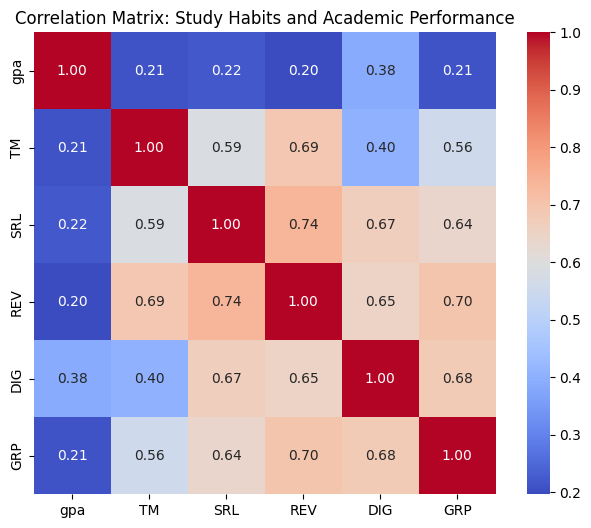

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True
)
plt.title("Correlation Matrix: Study Habits and Academic Performance")
plt.show()


Regression Analysis

In [193]:
import statsmodels.api as sm

X = clean_data[['TM', 'SRL', 'REV', 'DIG', 'GRP']]
y = clean_data['gpa']

X = sm.add_constant(X)  # 加截距项


Fitting a regression model

In [194]:
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.985
Date:                Mon, 12 Jan 2026   Prob (F-statistic):           6.14e-06
Time:                        23:07:36   Log-Likelihood:                -218.15
No. Observations:                 169   AIC:                             448.3
Df Residuals:                     163   BIC:                             467.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9736      0.326      2.989      0.0

In [200]:
import pandas as pd

# 关键指标
metrics = {
    "N": int(model.nobs),
    "R2": model.rsquared,
    "Adj_R2": model.rsquared_adj,
    "F": model.fvalue,
    "Prob(F)": model.f_pvalue
}
metrics


{'N': 169,
 'R2': np.float64(0.17645217895841103),
 'Adj_R2': np.float64(0.15118997585897576),
 'F': np.float64(6.984829401611287),
 'Prob(F)': np.float64(6.1360362866748455e-06)}

In [201]:
# 系数表（报告最常用）
coef_table = pd.DataFrame({
    "coef": model.params,
    "std_err": model.bse,
    "t": model.tvalues,
    "p": model.pvalues
}).round(4)

coef_table


,coef,std_err,t,p
const,0.9736,0.3257,2.9891,0.0032
TM,0.2530,0.1223,2.0692,0.0401
SRL,-0.0504,0.0982,-0.5132,0.6085
REV,-0.1569,0.1170,-1.3406,0.1819
DIG,0.5074,0.1071,4.7371,0.0000
GRP,-0.0938,0.1042,-0.9004,0.3692
